# Week 4 Exercise: Universal Bank



### Step1.Data Preprocessing

Please read the data into python IDE, and check the general info about this data.

#### Q1: Why would you develop a classification decision tree model on the bank dataset?

#### Q2. Based on Q1, which of the following could be used as a target variable for this data set?

##### Code for reference
import pandas as pd

loan = pd.read_csv("your path here")

loan.shape

loan.head()

loan.isnull().sum()



In [2]:
import pandas as pd

loan = pd.read_csv("D:/ASU Classes/CIS 508/UniversalBank2.csv")



In [3]:
loan.shape

(5000, 12)

In [4]:
loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,Undergrad,0,yes,no,no,no,no
1,45,19,34,3,1.5,Undergrad,0,yes,no,no,no,no
2,39,15,11,1,1.0,Undergrad,0,no,no,no,no,no
3,35,9,100,1,2.7,Graduate,0,no,no,no,no,no
4,35,8,45,4,1.0,Graduate,0,no,no,no,yes,no


In [5]:
loan.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

#### Q3. Based on the sample data,  how many customers didn't accept the loan offer?

To answer this question, we need to count the number of instances who didn't accept the loan offer, which is indicated by the target variable **Personal Loan**. We use **value_counts()** method.

##### code for reference:
loan['Personal Loan'].value_counts()

In [6]:
loan['Personal Loan'].value_counts()

no     4520
yes     480
Name: Personal Loan, dtype: int64

#### In the following lines, you will perform label encoding and partition the data into training set and test set.
1. first, perform label encoding for predictors

##### code for reference:
X = pd.get_dummies(loan.iloc[ , ], drop_first = True)

In [9]:
X = pd.get_dummies(loan.iloc[:,0:11 ], drop_first = True)

In [10]:
X

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_Professional,Education_Undergrad,Securities Account_yes,CD Account_yes,Online_yes,CreditCard_yes
0,25,1,49,4,1.6,0,0,1,1,0,0,0
1,45,19,34,3,1.5,0,0,1,1,0,0,0
2,39,15,11,1,1.0,0,0,1,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0
4,35,8,45,4,1.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,0,1,0,0,0,1,0
4996,30,4,15,4,0.4,85,0,1,0,0,1,0
4997,63,39,24,2,0.3,0,1,0,0,0,0,0
4998,65,40,49,3,0.5,0,0,0,0,0,1,0


2. Then, perform label encoding for the target variable.
##### code for reference:

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

y = labelencoder.fit_transform(loan['Target variable name'].values)

In [13]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

y = labelencoder.fit_transform(loan['Personal Loan'].values)

 3. As always, we split it into a training and a test part. Please use 25% of the data as test set (using random_state = 0).
 ##### code for reference:
 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train.shape

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train.shape

(3750, 12)

### Step 2: Build a Decision Tree Model
Now we build a model using the default setting of fully developing the tree (growing the tree until all leaves are pure). We fix the **random_state = 0** in the tree.

##### code for reference:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Step 3: Evaluate and interpret the Tree

#### Q4. After applying your decision tree model to the test set, what is the model accuracy?

To answer this question, you need to apply the decision tree model on the test set using **.predict** and use **accuracy_score()** to estimate the model accuracy.

##### code for reference:

from sklearn.metrics import accuracy_score

y_pred = tree.predict(X_test)

print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

In [16]:
from sklearn.metrics import accuracy_score

y_pred = tree.predict(X_test)

print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on test set: 0.982


#### Q5: Based on the obtained confusion matrix on the test set, how many customers are correctly classified as "Accept the loan offer"?

#### Q6: Based on the obtained confusion matrix on the test set, what is the true positive rate? Note: Please look at the labels in outputed confusion matrix and identify TP, TN, FP, and FN

To answer these two questions, we need to take a look at the confusion matrix.

##### code for reference:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree, X_test, y_test)

C:\Users\apere\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


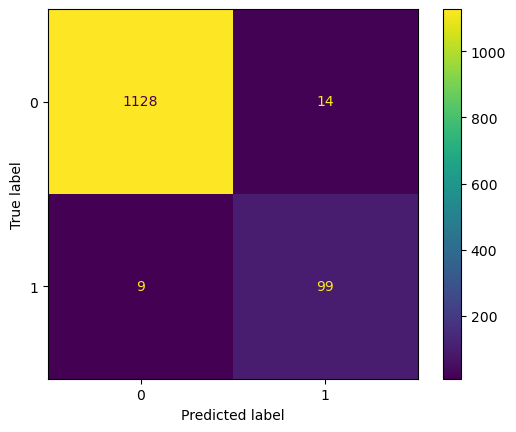

In [17]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree, X_test, y_test)

#### Q7. Based on the feature_importance_ attribute, which of the following  is the most important feature in predicting the target variable?

To answer this question, you need to get the importance measure for each variable. The importance value for predictors have been save in **feature_importances_** attribute.

##### code for reference

importance = pd.DataFrame(tree.feature_importances_, index = X.columns, columns = ["Importance"])

importance

In [18]:
importance = pd.DataFrame(tree.feature_importances_, index = X.columns, columns = ["Importance"])

importance

,Importance
Age,0.014981
Experience,0.011903
Income,0.447337
Family,0.130230
CCAvg,0.081564
Mortgage,0.006679
Education_Professional,0.003730
Education_Undergrad,0.280686
Securities Account_yes,0.000000
CD Account_yes,0.017300


#### Q8. In your decision tree model, which feature creates the first split of the data?

To answer this question, you can either use importance values, or visualize the decision tree and see which variable is at the top of the tree (you will need the tree visualization to answer the next question as well).

##### code for reference

loan_feature_names = X.columns.tolist()

loan_feature_names

from sklearn.tree import export_graphviz

import graphviz

dot_data = export_graphviz(tree,class_names=[ "Not Accept","Accept"],
                           feature_names=loan_feature_names,                        
                           filled = True)
                           

graph = graphviz.Source(dot_data, format= "png")

graph

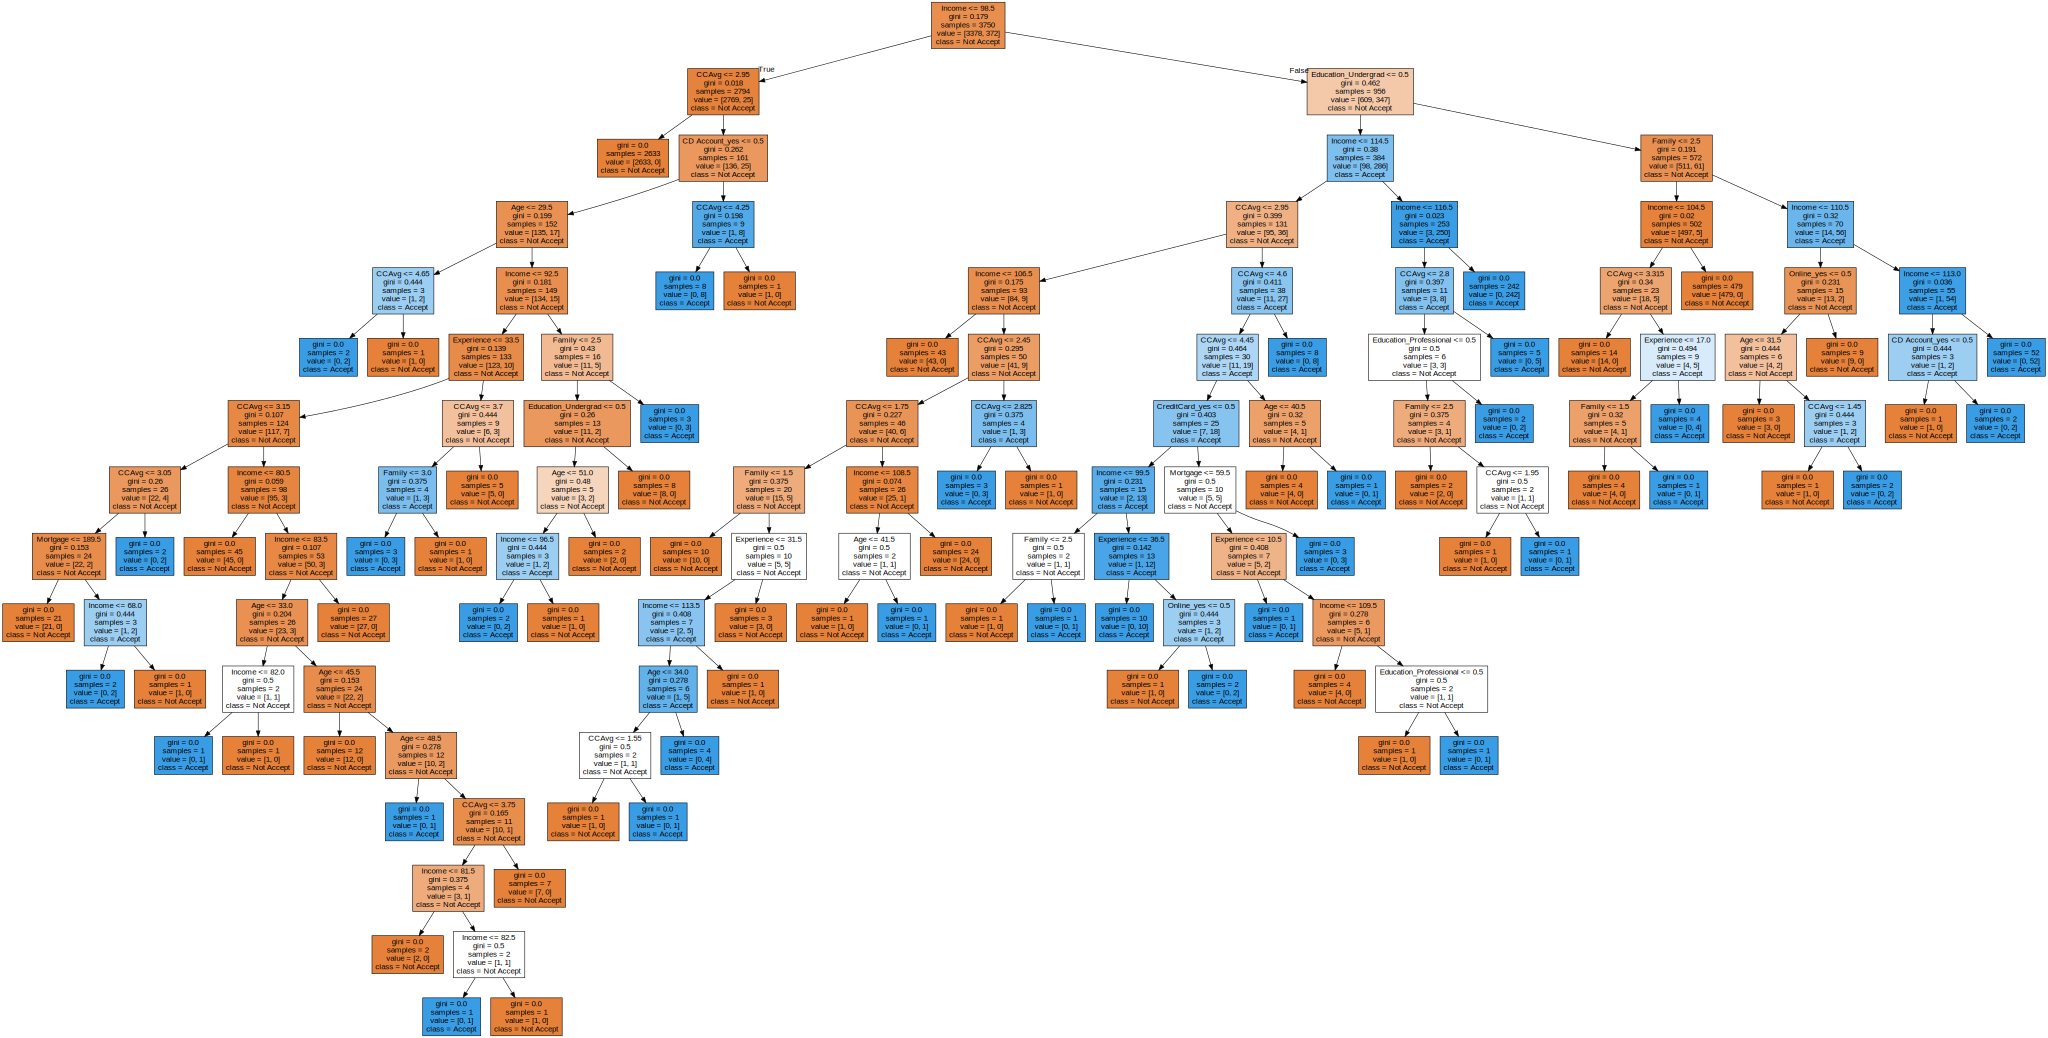

In [19]:
loan_feature_names = X.columns.tolist()

loan_feature_names

from sklearn.tree import export_graphviz

import graphviz

dot_data = export_graphviz(tree,class_names=[ "Not Accept","Accept"], feature_names=loan_feature_names,
filled = True)

graph = graphviz.Source(dot_data, format= "png")

graph

#### Q9. At the first split of the tree (the top node), how many instances are classified as "not accept"?

To answer this question, you need to look at the information in the first node in the tree visualization.

#### Q10. Based on the ROC curve, what is the area under the curve on the test set?

To answer this question, you need to create a roc curve.

##### code for reference

import matplotlib.pyplot as plt

from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label=" Decision Tree auc="+str(auc))

plt.legend(loc=4)

plt.show()

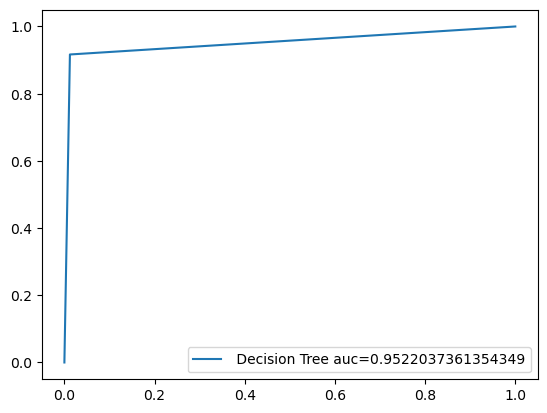

In [20]:
import matplotlib.pyplot as plt

from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label=" Decision Tree auc="+str(auc))

plt.legend(loc=4)

plt.show()